In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/fb_price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [5]:
df = df[['Date', 'Adj Close']]
df.head()

,Date,Adj Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [6]:
df.rename(columns={'Date': 'date',
                   'Adj Close': 'price_t'}, inplace=True)
df.head()

,date,price_t
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [7]:
df['returns'] = df['price_t'].pct_change(1)

In [8]:
expected_return_fb = df['returns'].mean()
expected_return_fb

0.0013494618587500079

In [9]:
df['expected_return_fb'] = expected_return_fb
df.head(100)

,date,price_t,returns,expected_return_fb
0,2012-05-18,38.230000,NaN,0.001349
1,2012-05-21,34.029999,-0.109861,0.001349
2,2012-05-22,31.000000,-0.089039,0.001349
3,2012-05-23,32.000000,0.032258,0.001349
4,2012-05-24,33.029999,0.032187,0.001349
...,...,...,...,...
95,2012-10-03,21.830000,-0.019758,0.001349
96,2012-10-04,21.950001,0.005497,0.001349
97,2012-10-05,20.910000,-0.047380,0.001349
98,2012-10-08,20.400000,-0.024390,0.001349


# Daily Expected return

This returns the **daily** expected return

In [10]:
df.set_index('date', inplace=True)

<Axes: xlabel='date'>

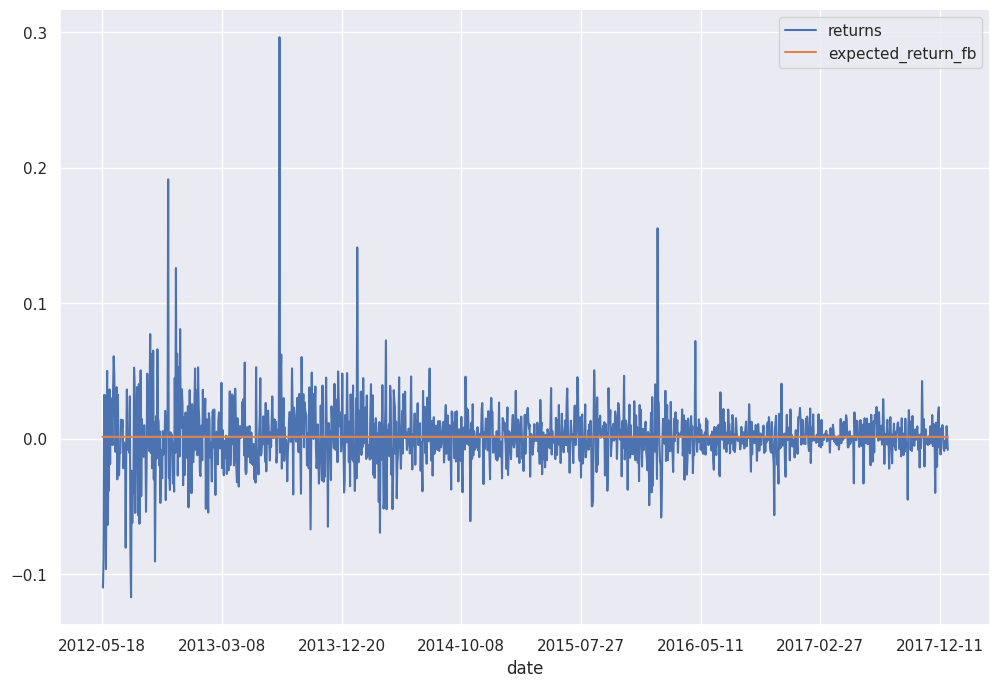

In [11]:
df[['returns', 'expected_return_fb']].plot(figsize=(12,8))

# Annual Expected return

To **annualize** the expected return we have to use the compound method. Considering 250 trading days in a year

In [12]:
annual_expected_return_fb = (1 + expected_return_fb)**250 - 1
annual_expected_return_fb

0.40093243279785296

In [13]:
def get_expected_return(df, price_col_name, annualised=True, annualise_method='sophisticated'):
  """
  Return the expected return of a stock given price data.
  """
  # Calculate returns of prices
  returns = df[price_col_name].pct_change(1)

  # Calculate the expected return using the mean method

  expected_return_daily = returns.mean()

  if annualised:
    if annualise_method == 'sophisticated':
      expected_return_annual = ((1 + expected_return_daily) ** 250) - 1
    else:
      # Crude method
      expected_return_annual = expected_return_daily * 250

    return expected_return_annual

  else:
    return expected_return_daily



In [14]:
# Annualised Expected return (sophisticated method)
get_expected_return(df, 'price_t')

0.40093243279785296

In [15]:
# Daily Expected return
get_expected_return(df, 'price_t', annualised=False)

0.0013494618587500079

In [16]:
# Annualised Expected return (crude method)
get_expected_return(df, 'price_t', annualised=True, annualise_method='Crude')

0.33736546468750195

# State Contingent Return

A **state** is a scenario like a regression or boom and returns can be different depending on the state considered.

In order to find the State Contingent Return you have to multiply  the probability of each scenario ("state") by the expected return.

Then add all resulting expected return.

The result of this estimate is only as good as the scenario probability and the analysis on the forecasted performance in each scenario.

# Asset Pricing Models

These are tools that use math and logic to determine the expected return;

They rely on linearity, perfect information (all investors have all the right and same information) and efficient market so all information get instantly reflected onto the prices of securities.

One of the most common method used is the "Capital Asset Pricing Model" (CAPM)


\begin{align}
  E[r_{j}] = r_{f}+\beta (E[r_{m}]-r_{f})
  \end{align}



In [18]:
sp500 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/sp500_price.csv')
sp500.head()


,Date,sp500
0,01/03/2012 16:00,1277.06
1,01/04/2012 16:00,1277.30
2,01/05/2012 16:00,1281.06
3,01/06/2012 16:00,1277.81
4,01/09/2012 16:00,1280.70


In [19]:
get_expected_return(sp500, 'sp500')

0.13854129369128

# Arbitrate Pricing Theory (APT)

It suggests that the expected terutn is affected by multiple factors


\begin{align}
  E[r_{j}] = r_{f}+\beta_{1}F_{1}+\beta_{2}F_{2}+...+\beta_{n}F_{n}
  \end{align}

#Standard deviation formula

Standard deviation is how differently the stock behaved compared to the forecast of the stock performance.

It is the mean squared error of every datapoint and it represent the risk of a stock expressed in percentage.

\begin{align}
   Variance = \sqrt{\frac{1}{n-1}\sum_{t=1}^{n}(r_{j}-E[r_{j}])^2}\equiv \sigma_{j}
  \end{align}


\begin{align}
  \sigma_{j} = \sqrt{\sigma_{j}^2}
\end{align}


# Automatically calculate the risk of a given stock

We will start by calculating the Variance using a numpy function, then square rooting it to get the SD

This will return the daily SD of the stock

In [20]:
import numpy as np
df.head()

,price_t,returns,expected_return_fb
date,,,
2012-05-18,38.230000,NaN,0.001349
2012-05-21,34.029999,-0.109861,0.001349
2012-05-22,31.000000,-0.089039,0.001349
2012-05-23,32.000000,0.032258,0.001349
2012-05-24,33.029999,0.032187,0.001349


In [21]:
var_fb = np.var(df['returns'], ddof=1) #ddof parameter assures the SD is calculated using 1/n-1
var_fb

0.000546801751575295

In [22]:
sd_fb = np.sqrt(var_fb)
sd_fb

0.023383792497695812

In [23]:
# In just one line using another method
sd_fb = np.std(df['returns'], ddof=1)
sd_fb

0.023383792497695812

In [24]:
# annualized risk for fb stock
sd_fb_annualised = sd_fb * np.sqrt(250)
sd_fb_annualised

0.3697302231273821

In [25]:
# annualized expected return for fb stock
expected_return_fb = (1 + df['returns'].mean()) ** 250-1

We can say that Facebook could be a great investment since the expected return is higher that the annualized risk.

However, this two components are not sufficient to determine if a stock could be a good investment or not

# Extract Stock Price Data (generalized approach)

In [26]:
import pandas as pd
#import data_provider "placeholder for what the future data provider would be"


In [28]:
sp500_tickers = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/SP500_Tickers.csv')
sp500_tickers

,Ticker
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
500,YUM
501,ZBRA
502,ZBH
503,ZION


In [29]:
'''all_dfs = []
for ticker in sp500_tickers['Tickers']:
  df = data_provider.get(symbol=ticker, attribute='close',
                         start_date='2012-01-01',
                         end_date='2023-06-12'
                         )
  all_dfs.append(df)
#the data_provide is the class that would allow to call the specific data about the given ticker

df_price = pd.DataFrame(data=all_dfs)'''


"all_dfs = []\nfor ticker in sp500_tickers['Tickers']:\n  df = data_provider.get(symbol=ticker, attribute='close',\n                         start_date='2012-01-01',\n                         end_date='2023-06-12'\n                         )\n  all_dfs.append(df)\n#the data_provide is the class that would allow to call the specific data about the given ticker\n\ndf_price = pd.DataFrame(data=all_dfs)"

# Exploring Stock Price Data

In [31]:
df_price = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Datasets/SP500_Price_Data.xlsx')
df_price


,Date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2012-01-03 16:00:00,83.49,27.14,35.00,18.25,52.95,12.20,28.57,5.48,69.10,...,102.78,113.97,27.34,32.44,25.14,42.12,35.72,53.94,16.77,31.01
1,2012-01-04 16:00:00,84.18,27.03,35.32,18.11,52.93,12.11,28.28,5.46,70.72,...,102.20,112.01,27.16,32.10,25.97,42.40,35.45,53.21,17.14,31.02
2,2012-01-05 16:00:00,83.80,26.97,33.36,18.27,51.92,12.11,28.48,5.46,71.17,...,103.97,110.84,27.28,32.38,25.60,42.73,35.40,53.84,17.62,31.04
3,2012-01-06 16:00:00,83.37,26.73,33.80,18.14,51.83,12.24,28.72,5.43,71.50,...,103.10,106.94,27.20,32.17,25.17,43.04,35.11,53.98,17.64,31.03
4,2012-01-09 16:00:00,83.87,26.72,33.00,18.21,51.74,12.20,28.53,5.59,71.48,...,102.22,106.64,27.22,32.87,25.27,42.87,34.95,54.38,17.88,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2021-05-24 16:00:00,202.61,117.29,NaN,283.88,284.85,96.50,497.83,77.44,188.00,...,262.92,129.46,71.67,123.77,115.90,120.52,501.62,167.86,57.53,NaN
2363,2021-05-25 16:00:00,201.71,118.40,NaN,282.27,285.99,96.57,505.08,77.86,189.01,...,261.59,129.03,71.24,124.09,116.77,120.60,501.92,167.76,56.02,NaN
2364,2021-05-26 16:00:00,201.58,116.75,NaN,285.85,283.95,97.30,506.98,78.34,188.64,...,260.06,132.45,71.00,123.70,116.86,120.49,501.33,164.18,56.72,NaN
2365,2021-05-27 16:00:00,203.24,115.69,NaN,284.58,280.05,97.25,498.28,78.42,189.73,...,260.99,132.67,70.27,123.02,117.60,120.09,498.10,167.63,57.87,NaN


In [32]:
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price.set_index('Date', inplace=True)
df_price.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,83.49,27.14,35.00,18.25,52.95,12.20,28.57,5.48,69.10,12.12,...,102.78,113.97,27.34,32.44,25.14,42.12,35.72,53.94,16.77,31.01
2012-01-04 16:00:00,84.18,27.03,35.32,18.11,52.93,12.11,28.28,5.46,70.72,12.03,...,102.20,112.01,27.16,32.10,25.97,42.40,35.45,53.21,17.14,31.02
2012-01-05 16:00:00,83.80,26.97,33.36,18.27,51.92,12.11,28.48,5.46,71.17,12.32,...,103.97,110.84,27.28,32.38,25.60,42.73,35.40,53.84,17.62,31.04
2012-01-06 16:00:00,83.37,26.73,33.80,18.14,51.83,12.24,28.72,5.43,71.50,12.23,...,103.10,106.94,27.20,32.17,25.17,43.04,35.11,53.98,17.64,31.03
2012-01-09 16:00:00,83.87,26.72,33.00,18.21,51.74,12.20,28.53,5.59,71.48,12.47,...,102.22,106.64,27.22,32.87,25.27,42.87,34.95,54.38,17.88,32.00


In [33]:
df_price.isna().sum()

MMM       0
ABT       0
ABBV    235
ABMD      1
ACN       0
       ... 
YUM       0
ZBRA      0
ZBH       0
ZION      0
ZTS     271
Length: 505, dtype: int64

In [34]:
summaries = df_price.describe().T
summaries.head()

,count,mean,std,min,25%,50%,75%,max
MMM,2367.0,159.759772,39.135366,82.51,137.5600,163.380,187.0500,258.63
ABT,2367.0,56.500782,24.866874,25.91,38.4900,45.360,72.6350,128.23
ABBV,2132.0,72.011909,20.228378,33.00,56.7125,66.840,89.3000,123.21
ABMD,2366.0,143.004577,118.678731,12.17,25.6025,112.815,254.3425,449.75
ACN,2367.0,130.024782,57.436913,51.74,80.6700,115.980,164.9600,292.54


In [35]:
len(summaries[summaries['count'] < 2367]) # returns all tickers that have lesser than 2367 (or about 9 years) datapoints

54

In [36]:
# Using fill_method=None allows us to keep the NaN values which would otherwise be transformed in 0.00 , modifying the expected return calculations
df_returns = df_price.pct_change(1, fill_method=None)
df_returns

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 16:00:00,0.008264,-0.004053,0.009143,-0.007671,-0.000378,-0.007377,-0.010151,-0.003650,0.023444,-0.007426,...,-0.005643,-0.017198,-0.006584,-0.010481,0.033015,0.006648,-0.007559,-0.013534,0.022063,0.000322
2012-01-05 16:00:00,-0.004514,-0.002220,-0.055493,0.008835,-0.019082,0.000000,0.007072,0.000000,0.006363,0.024106,...,0.017319,-0.010445,0.004418,0.008723,-0.014247,0.007783,-0.001410,0.011840,0.028005,0.000645
2012-01-06 16:00:00,-0.005131,-0.008899,0.013189,-0.007115,-0.001733,0.010735,0.008427,-0.005495,0.004637,-0.007305,...,-0.008368,-0.035186,-0.002933,-0.006485,-0.016797,0.007255,-0.008192,0.002600,0.001135,-0.000322
2012-01-09 16:00:00,0.005997,-0.000374,-0.023669,0.003859,-0.001736,-0.003268,-0.006616,0.029466,-0.000280,0.019624,...,-0.008535,-0.002805,0.000735,0.021759,0.003973,-0.003950,-0.004557,0.007410,0.013605,0.031260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 16:00:00,0.003715,0.001366,NaN,0.015380,0.005187,0.011849,0.019997,0.003499,-0.013900,0.013407,...,0.000419,0.016489,-0.005136,0.007817,0.003724,0.006766,0.014747,0.003227,-0.009811,NaN
2021-05-25 16:00:00,-0.004442,0.009464,NaN,-0.005671,0.004002,0.000725,0.014563,0.005424,0.005372,-0.014008,...,-0.005059,-0.003321,-0.006000,0.002585,0.007506,0.000664,0.000598,-0.000596,-0.026247,NaN
2021-05-26 16:00:00,-0.000644,-0.013936,NaN,0.012683,-0.007133,0.007559,0.003762,0.006165,-0.001958,0.004736,...,-0.005849,0.026505,-0.003369,-0.003143,0.000771,-0.000912,-0.001175,-0.021340,0.012496,NaN


In [37]:
# Searching for outliers
df_returns.max().max()

2.2031602708803613

2.20 means that a stock has gained onver 220% in a day. Although statistically this is an outlier, this situation could happen in the real world so albeit being very rare, it is not an error

If we want to follow the statistics, in order to find the cutoff for outliers we have to find the standard deviation among all returns of every stock and multiply that for an empirical coefficient n which usually is 2 or 3.

In [38]:
cutoff_threshold = df_returns.unstack().reset_index()[0].std() * 3
cutoff_threshold

0.058929544213004836

This value above however is very low, and would require us to erase a lot of important data

Now we do the same to find the minimum outliers

In [39]:
# Searching for outliers
df_returns.min().min()

-0.7613931923555355

Since stocks may lose 76% of their value in a day, this value is also not considered an outlier

In [40]:
df_returns.describe()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,2366.000000,2366.000000,2131.000000,2365.000000,2366.000000,2366.000000,2366.000000,2366.000000,2365.000000,2366.000000,...,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2095.000000
mean,0.000464,0.000716,0.000711,0.001571,0.000812,0.001078,0.001380,0.001798,0.000635,0.000494,...,0.000490,0.000493,0.000479,0.000778,0.000790,0.000568,0.001370,0.000612,0.000728,0.000955
std,0.013227,0.014076,0.017848,0.028260,0.014441,0.020098,0.018255,0.036815,0.020331,0.018964,...,0.013842,0.029411,0.012299,0.020091,0.016494,0.015850,0.022562,0.016183,0.020286,0.015776
min,-0.129450,-0.097857,-0.162524,-0.313320,-0.102967,-0.123905,-0.147452,-0.242291,-0.203439,-0.173010,...,-0.107380,-0.244346,-0.126918,-0.170770,-0.114965,-0.188229,-0.238459,-0.139943,-0.120465,-0.146956
25%,-0.004899,-0.005720,-0.008069,-0.010223,-0.005717,-0.009376,-0.006823,-0.016162,-0.008026,-0.008636,...,-0.005400,-0.012711,-0.005425,-0.008327,-0.007140,-0.005877,-0.008259,-0.006467,-0.010159,-0.006509
50%,0.000769,0.000661,0.001234,0.001558,0.001177,0.001131,0.001397,0.000061,0.000447,0.000903,...,0.000692,-0.000202,0.000661,0.000626,0.000797,0.000692,0.001105,0.000556,0.001021,0.000965
75%,0.006750,0.007975,0.009405,0.014845,0.007687,0.011237,0.010216,0.018641,0.009305,0.009901,...,0.006704,0.012839,0.006807,0.009727,0.009155,0.007265,0.010835,0.008300,0.011345,0.008417
max,0.125986,0.109360,0.137673,0.292778,0.128573,0.188774,0.177193,0.522901,0.165576,0.149582,...,0.151057,0.276883,0.112577,0.184366,0.124438,0.232484,0.172142,0.155798,0.238811,0.119793


In [41]:
summaries = df_returns.agg(['mean', 'std']).T
summaries

,mean,std
MMM,0.000464,0.013227
ABT,0.000716,0.014076
ABBV,0.000711,0.017848
ABMD,0.001571,0.028260
ACN,0.000812,0.014441
...,...,...
YUM,0.000568,0.015850
ZBRA,0.001370,0.022562
ZBH,0.000612,0.016183
ZION,0.000728,0.020286


<Axes: xlabel='std', ylabel='mean'>

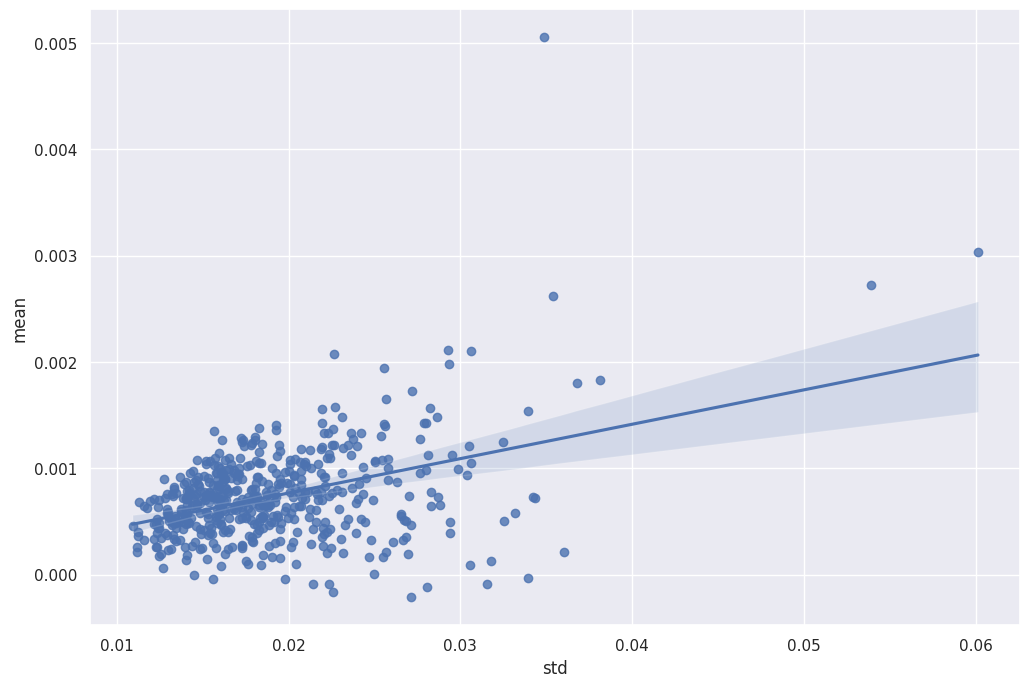

In [42]:
# Let's explore the correlation between mean and std
plt.figure(figsize=[12,8])
sns.regplot(x=summaries['std'], y=summaries['mean'])

In [44]:
df_esg = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/SP500_ESG_Data.csv')
df_esg


,Symbol,Security,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level,Data Date
0,MMM,3M Company,35.0,13.2,13.6,8.1,3.0,2021-05
1,ABT,Abbott Laboratories,30.0,3.1,16.2,10.6,3.0,2021-05
2,ABBV,AbbVie Inc.,29.0,0.6,17.1,11.3,3.0,2021-05
3,ABMD,Abiomed,NaN,NaN,NaN,NaN,NaN,NaN
4,ACN,Accenture,11.0,0.6,5.0,5.8,2.0,2021-05
...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,21.0,4.0,12.9,4.4,3.0,2021-05
501,ZBRA,Zebra Technologies,NaN,NaN,NaN,NaN,NaN,NaN
502,ZBH,Zimmer Biomet,34.0,4.8,18.9,10.5,2.0,2021-05
503,ZION,Zions Bancorp,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

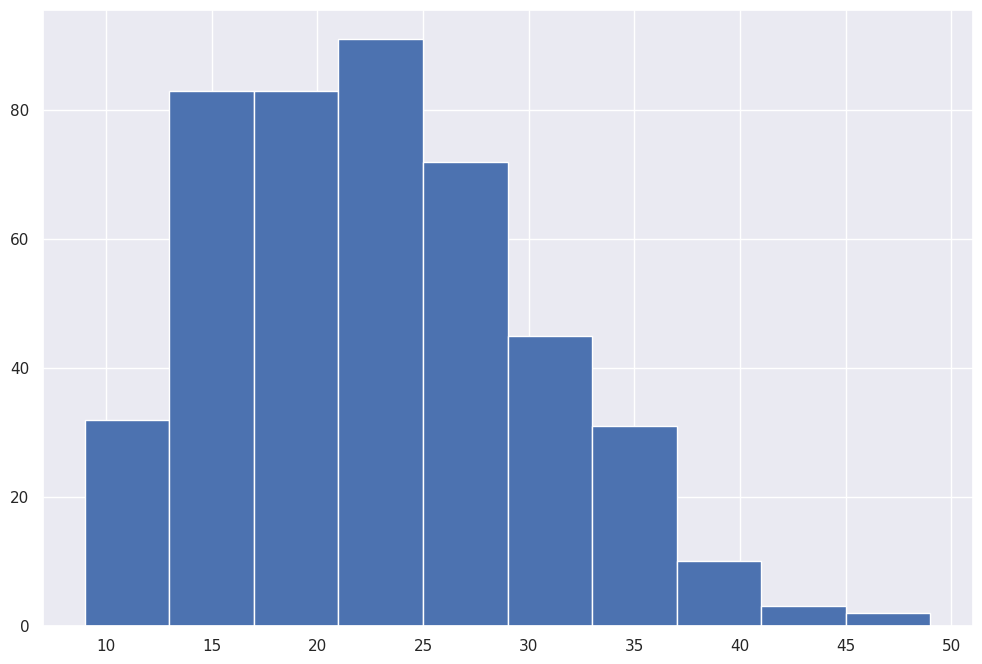

In [45]:
df_esg['ESG Risk Score'].hist(figsize=[12, 8])